## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
cmb = mouse_metadata.merge(study_results, on='Mouse ID')

# Display the data table for preview
cmb.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
cmb['Mouse ID'].nunique()

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cmb[cmb.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
cmb[cmb['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = cmb[cmb['Mouse ID']!='g989']
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
sum_stats = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
sum_stats
sum_stats = sum_stats[["mean", "std"]]
sum_stats["var"] = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sum_stats
sum_stats["median"] = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
sum_stats
sum_stats["sem"] = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sum_stats
sum_stats = sum_stats[["mean", "median", "var", "std", "sem"]]
sum_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_sum_df = clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_sum_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

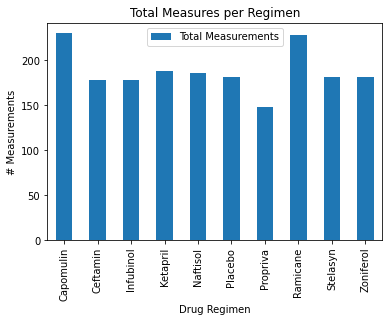

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_measures = clean.groupby("Drug Regimen").count()
bar_total_measures = total_measures[["Mouse ID"]].rename(columns = {"Mouse ID": "Total Measurements"})
bar_total_measures.plot(kind = "bar", title = "Total Measures per Regimen")
plt.ylabel("# Measurements")
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

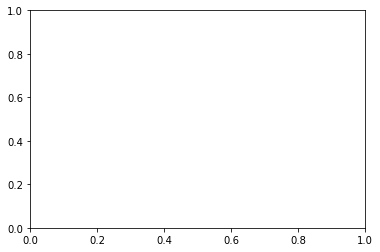

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis =[value for value in range(len(clean["Drug Regimen"].unique()))]
y_axis = clean.groupby("Timepoint").count()
plt.bar(x_axis, y_axis)




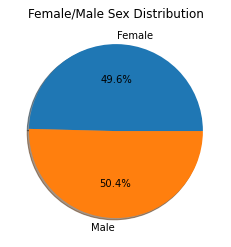

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice = clean.groupby("Sex")["Mouse ID"].nunique()
sex_graph = sex_mice.plot(kind = 'pie',
                          y='Sex', 
                          title = 'Female/Male Sex Distribution', 
                          autopct="%1.1f%%", 
                          shadow=True, 
                          legend= False).yaxis.set_visible(False)
plt.show()

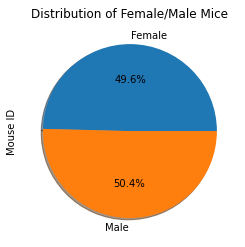

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = sex_mice.index
sizes= clean.groupby('Sex')["Mouse ID"].nunique()
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("Distribution of Female/Male Mice")
plt.ylabel("Mouse ID")
plt.show()

## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_copy = pd.DataFrame.copy(clean)
four_drugs = clean.set_index("Drug Regimen").loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]].reset_index()
# Start by getting the last (greatest) timepoint for each mouse
four_drugs = four_drugs.groupby("Mouse ID")["Timepoint"].max()
four_drugs = pd.DataFrame(four_drugs).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_four = pd.merge(clean_copy, four_drugs, on = ["Timepoint", "Mouse ID"])
merged_four

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [90]:
merged_four

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [94]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]
tumor_vol_data = []
      
# Create empty list to fill with tumor vol data (for plotting)
list = {}


quartiles = merged_four["Tumor Volume (mm3)"].quantile([.25,.50,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

print(f"The lower quartile of Tumor Volume (mm3) is {lowerq}.")
print(f"The upper quartile of Tumor Volume (mm3) is {upperq}.")
print(f"The Interquartile range of Tumor Volume (mm3) is {IQR}.")
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    for index, row in merged_four.iterrows():
        if row["Drug Regimen"] == treatment:
            lists.setdefault(treatment, []).append(row["Tumor Volume (mm3)"])
frame= pd.DataFrame(lists)

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"Below {lower_bound} are possible outliers")
print(f"Above {upper_bound} are possible outliers")
print(f"{IQR} is the IQR value")


The lower quartile of Tumor Volume (mm3) is 37.1877438025.
The upper quartile of Tumor Volume (mm3) is 59.930261755.
The Interquartile range of Tumor Volume (mm3) is 22.742517952499995.
Below 3.0739668737500097 are possible outliers
Above 94.04403868374999 are possible outliers
22.742517952499995 is the IQR value


In [100]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([frame["Capomulin"], frame["Ramicane"],["Infubinol"], ["Ceftamin"], label = treatments, sym = "b")
plt.title("Final Tumor Volume Across 4 Treatments")

SyntaxError: invalid syntax (<ipython-input-100-2954b3719e46>, line 2)

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
